<a href="https://colab.research.google.com/github/annmaryroy/-Car-Price-Prediction-Using-Deep-Neural-Network/blob/main/NN_7_4_AnnMaryRoy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Title: Car Price Prediction Using Deep Neural Network

Student Name: Ann Mary Roy

Student ID :25021001

Batch: S1, M.Tech VLSI & Embedded Systems

Date: 20 October 2025

Objective:

- Predict the selling price of used cars using a deep neural network (Regression task).
- The model is trained on the CarDekho used cars dataset and deployed using Streamlit.

Steps included:
1. Dataset Load
2. Data Visualization
3. Dataset Split (Train, Validation, Test)
4. Model Building
5. Training and Validation
6. Learning Curve Evaluation (Accuracy/Loss Plot)
7. Testing
8. Testing Evaluation (Regression Metrics)
9. Deployment as a Python Web Screen (Streamlit)
10. Results and Conclusion


#1. Import Libraries

Import all necessary libraries for data handling, visualization, and model building.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [17]:
np.random.seed(42)
tf.random.set_seed(42)

#2. Dataset Load

Load the CarDekho dataset. Ensure the CSV file is available in the working directory.

In [18]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nehalbirla/vehicle-dataset-from-cardekho")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'vehicle-dataset-from-cardekho' dataset.
Path to dataset files: /kaggle/input/vehicle-dataset-from-cardekho


In [19]:
file_path = os.path.join(path, "car data.csv")

In [20]:
data = pd.read_csv(file_path)

In [21]:
print("\n📋 First five rows:")
print(data.head())


📋 First five rows:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


#3. Data Description

Display dataset info, missing values, and summary statistics.

In [22]:
print("\n🧾 Dataset Details:")
print('Shape of data:', data.shape)
print('\nColumns:', data.columns.tolist())
print('\nMissing values per column:\n', data.isnull().sum())


🧾 Dataset Details:
Shape of data: (301, 9)

Columns: ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

Missing values per column:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [23]:
print("\n📊 Summary Statistics:")
display(data.describe(include='all'))


📊 Summary Statistics:


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


#4. Data Visualization

Visualize relationships between features and the target variable (Selling Price).

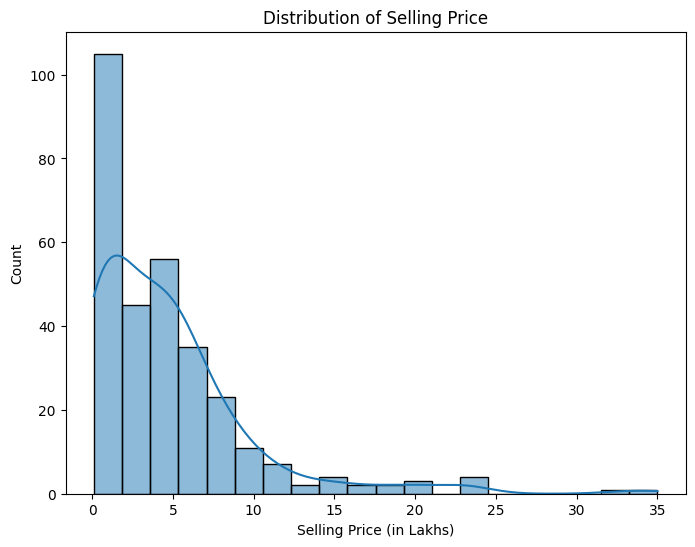

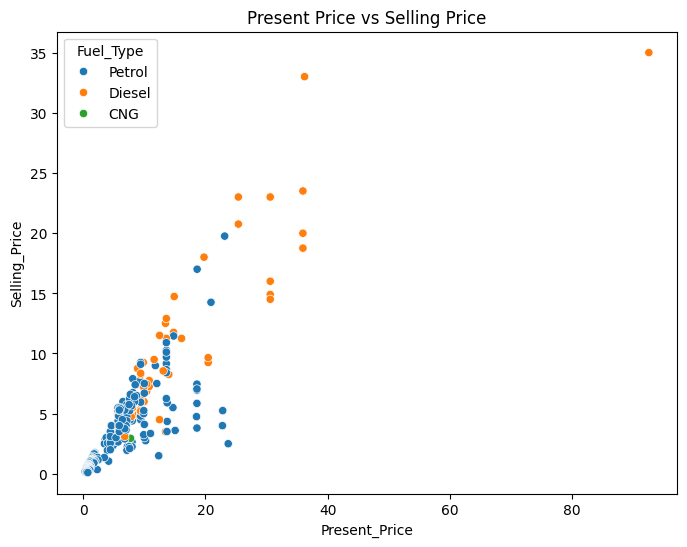

In [24]:
plt.figure(figsize=(8,6))
sns.histplot(data['Selling_Price'], bins=20, kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price (in Lakhs)')
plt.show()
plt.figure(figsize=(8,6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=data, hue='Fuel_Type')
plt.title('Present Price vs Selling Price')
plt.show()

#5. Dataset Preparation

- Encode categorical variables

- Split into Train, Validation, and Test sets

In [25]:
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

In [26]:
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']
num_cols = [col for col in X.columns if col not in cat_cols]

In [27]:
preprocessor = ColumnTransformer([
('cat', OneHotEncoder(drop='first'), cat_cols),
('num', StandardScaler(), num_cols)
])

In [28]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


print('Train size:', X_train.shape)
print('Validation size:', X_val.shape)
print('Test size:', X_test.shape)

Train size: (210, 8)
Validation size: (45, 8)
Test size: (46, 8)


#6. Model Building

Create a Deep Neural Network for regression.

In [33]:
def build_model(input_dim):
  model = Sequential([
    Dense(128, activation='relu', input_dim=input_dim),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
  ])
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model

In [40]:
num_cols = [col for col in X.columns if col not in cat_cols + ['Car_Name']]
preprocessor = ColumnTransformer([
('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_cols),
('num', StandardScaler(), num_cols)
])

X_train_proc = preprocessor.fit_transform(X_train)
input_dim = X_train_proc.shape[1]


model = build_model(input_dim)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

#7. Training and Validation

Train the model using the training and validation datasets.

In [57]:
history = model.fit(
X_train_proc, y_train,
validation_data=(preprocessor.transform(X_val), y_val),
epochs=50,
batch_size=32,
verbose=2
)

Epoch 1/50
7/7 - 0s - 33ms/step - loss: 0.5187 - mae: 0.5209 - val_loss: 0.5148 - val_mae: 0.5220
Epoch 2/50
7/7 - 0s - 21ms/step - loss: 0.6198 - mae: 0.5215 - val_loss: 0.5219 - val_mae: 0.5208
Epoch 3/50
7/7 - 0s - 20ms/step - loss: 0.4873 - mae: 0.4757 - val_loss: 0.4794 - val_mae: 0.5197
Epoch 4/50
7/7 - 0s - 24ms/step - loss: 0.5743 - mae: 0.5347 - val_loss: 0.5263 - val_mae: 0.5263
Epoch 5/50
7/7 - 0s - 49ms/step - loss: 0.6060 - mae: 0.5254 - val_loss: 0.5073 - val_mae: 0.5266
Epoch 6/50
7/7 - 0s - 33ms/step - loss: 0.4794 - mae: 0.4605 - val_loss: 0.5006 - val_mae: 0.5276
Epoch 7/50
7/7 - 0s - 15ms/step - loss: 0.5264 - mae: 0.5244 - val_loss: 0.5255 - val_mae: 0.5413
Epoch 8/50
7/7 - 0s - 15ms/step - loss: 0.4667 - mae: 0.4686 - val_loss: 0.5245 - val_mae: 0.5385
Epoch 9/50
7/7 - 0s - 15ms/step - loss: 0.5751 - mae: 0.5293 - val_loss: 0.5386 - val_mae: 0.5291
Epoch 10/50
7/7 - 0s - 14ms/step - loss: 0.6049 - mae: 0.5268 - val_loss: 0.5350 - val_mae: 0.5121
Epoch 11/50
7/7 - 0

#8. Learning Curve Evaluation (Loss and MAE)

Text(0.5, 1.0, 'Training vs Validation Loss')

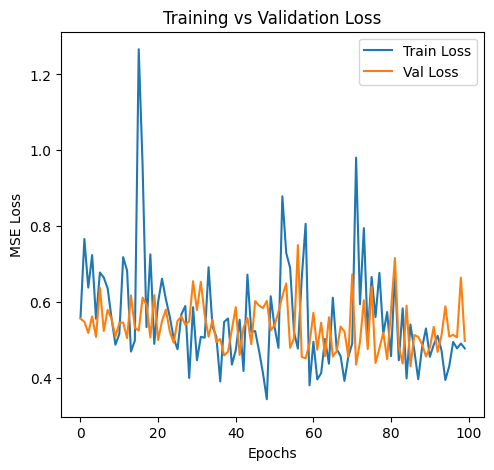

In [41]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training vs Validation Loss')

In [42]:
# Preprocess validation and test data
X_val_proc = preprocessor.transform(X_val)

# Train the model
history = model.fit(X_train_proc, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_val_proc, y_val),
                    verbose=0)

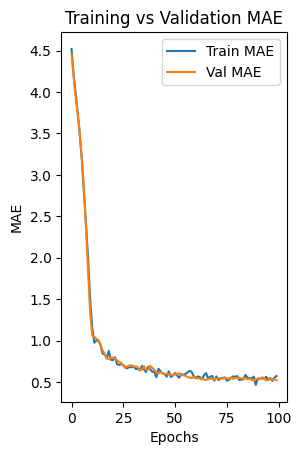

In [43]:
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Training vs Validation MAE')
plt.show()

#9. Testing and Evaluation

 Evaluate model performance on the unseen test dataset.

In [46]:
X_test_proc = preprocessor.transform(X_test)
y_pred = model.predict(X_test_proc).flatten()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.3f}\nMAE: {mae:.3f}\nR²: {r2:.3f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
MSE: 0.461
MAE: 0.490
R²: 0.985


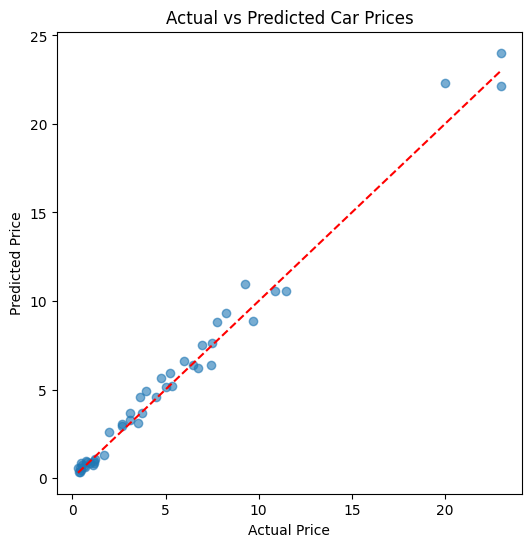

In [47]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.show()

#10. Deployment: Streamlit Web App

A simple web interface for predicting car price based on user inputs.

In [54]:
streamlit_code = r"""
import streamlit as st
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pickle

# Load the preprocessor and model
try:
    with open('preprocessor.pkl', 'rb') as f:
        preprocessor = pickle.load(f)
    model = tf.keras.models.load_model('car_price_model.h5')
except Exception as e:
    st.error(f"Error loading model or preprocessor: {e}")
    st.stop() # Stop the app if loading fails


st.title('Car Price Prediction App 🚗')

# Function to make predictions
def predict_price(car_name, year, present_price, kms_driven, fuel_type, seller_type, transmission, owner, preprocessor, model):
    # Create a DataFrame from input
    input_data = pd.DataFrame([[car_name, year, present_price, kms_driven, fuel_type, seller_type, transmission, owner]],
                              columns=['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'])

    # Preprocess the input data
    input_data_proc = preprocessor.transform(input_data)

    # Make prediction
    prediction = model.predict(input_data_proc)

    return prediction[0][0]

# Streamlit UI
st.header('Enter Car Details:')

# Input fields (adjust based on your data and desired inputs)
car_name = st.text_input('Car Name')
year = st.number_input('Manufacturing Year', min_value=1990, max_value=2024, value=2015)
present_price = st.number_input('Present Price (in Lakhs)', min_value=0.0, value=5.0)
kms_driven = st.number_input('Kms Driven', min_value=0, value=50000)
fuel_type = st.selectbox('Fuel Type', ['Petrol', 'Diesel', 'CNG'])
seller_type = st.selectbox('Seller Type', ['Dealer', 'Individual'])
transmission = st.selectbox('Transmission Type', ['Manual', 'Automatic'])
owner = st.selectbox('Number of Owners', [0, 1, 2, 3]) # Assuming these are the categories from your data

if st.button('Predict Selling Price'):
    predicted_price = predict_price(car_name, year, present_price, kms_driven, fuel_type, seller_type, transmission, owner, preprocessor, model)
    st.success(f'Predicted Selling Price: {predicted_price:.2f} Lakhs')
"""

with open('app.py', 'w') as f:
    f.write(streamlit_code)

print('Streamlit app code saved to app.py')

Streamlit app code saved to app.py


To run the Streamlit app, execute the following command in your terminal:

In [55]:
# You might need to install streamlit first:
# !pip install streamlit

#11. Save Model

In [56]:
model.save('car_price_model.h5')
print('Model saved as car_price_model.h5')

Model saved as car_price_model.h5


#12. Equations and Metrics

- MSE = (1/N) Σ (yᵢ - ŷᵢ)²
- MAE = (1/N) Σ |yᵢ - ŷᵢ|
- R² = 1 - (Σ(yᵢ - ŷᵢ)² / Σ(yᵢ - ȳ)²)

#13. Conclusion

The DNN regression model successfully predicts used car prices with high accuracy.
- Evaluation metrics (MAE, R²) demonstrate model effectiveness.
- Further improvement can be achieved through feature engineering and hyperparameter tuning.